# KNN

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [16]:
df = pd.read_csv('../../dataset/heart-failure-tratado.csv')
df.head(3)

,ExerciseAngina,Oldpeak,ST_Slope,MaxHR,ChestPainType,HeartDisease
0,0,0.0,2,172,1,0
1,0,1.0,1,156,2,1
2,0,0.0,2,98,1,0


In [17]:
# Features
x = df.drop(columns=['HeartDisease'])

# Target
y = df['HeartDisease']

In [18]:
# Padronizar os dados
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [19]:
# Split do dataset em conjuntos de treinamento e teste.

# # 70% treino, 30% teste
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=45)

# 90% treino, 10% teste
# x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.1, random_state=45)

In [20]:
# Treinamento
modelo_knn = KNeighborsClassifier(n_neighbors=3)
modelo_knn.fit(x_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [21]:
y_pred = modelo_knn.predict(x_test)

# Calculando métricas de desempenho (acurácia, precisão, revocação e F1-Score)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Acurácia: 0.8297101449275363
Precisão: 0.8297101449275363
Recall: 0.8297101449275363
F1-Score: 0.8297101449275363


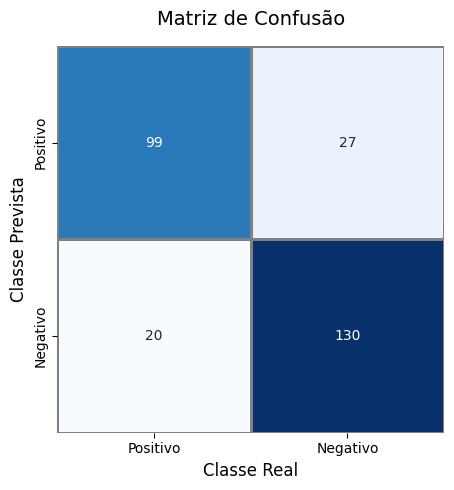

In [22]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Positivo', 'Negativo'],
            yticklabels=['Positivo', 'Negativo'],
            linewidths=1, linecolor='gray', square=True)

plt.title("Matriz de Confusão", fontsize=14, pad=15)
plt.xlabel("Classe Real", fontsize=12)
plt.ylabel("Classe Prevista", fontsize=12)
plt.tight_layout()
plt.show()

# Tuning dos hiperparâmetros

In [23]:
knn = KNeighborsClassifier()

# Definir o grid de hiperparâmetros
param_grid = {
    'n_neighbors': list(range(1, 15)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Configurar o GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# Treinar
grid_search.fit(x_train, y_train)

# Resultados
print("Melhores parâmetros:", grid_search.best_params_)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Melhores parâmetros: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Acurácia: 0.8297101449275363
Precisão: 0.8297101449275363
Recall: 0.8297101449275363
F1-Score: 0.8297101449275363


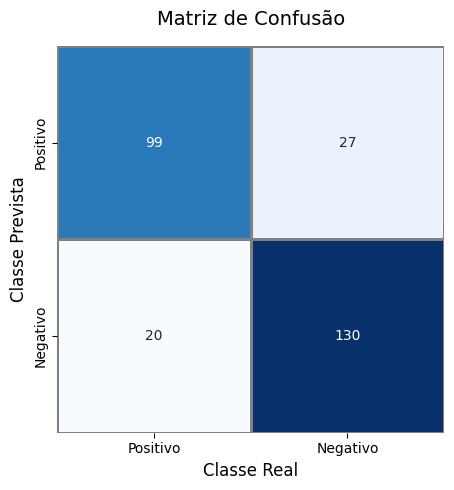

In [24]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Positivo', 'Negativo'],
            yticklabels=['Positivo', 'Negativo'],
            linewidths=1, linecolor='gray', square=True)

plt.title("Matriz de Confusão", fontsize=14, pad=15)
plt.xlabel("Classe Real", fontsize=12)
plt.ylabel("Classe Prevista", fontsize=12)
plt.tight_layout()
plt.show()